

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

5) Linear Regression

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [2]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, f_oneway
from statsmodels.stats.power import ttest_power
import pandas as pd

In [3]:
t_stat, p_value = ttest_ind(GPU1, GPU2)
print(f'two sample t-test t_statistic :{t_stat[0]}')
print(f'two sample t-test p_value     :{p_value[0]}')

two sample t-test t_statistic :-2.627629513471839
two sample t-test p_value     :0.013794282041452725


As the p-value(0.013) of two sample test is less than 0.05, null hypothesis is rejected.
This implies that there is a significant difference between the speeds of GPU1 and GPU2

## Question 2 

He is trying a third GPU - GPU3.

In [4]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [5]:
t_stat2, p_value2 = ttest_ind(GPU1, GPU3)
print(f'two sample t-test t_statistic  :{t_stat2[0]}')
print(f'two sample t-test p_value      :{p_value2[0]}')

two sample t-test t_statistic  :-1.4988943759093303
two sample t-test p_value      :0.14509210993138993


As the p-value(0.14) of two sample test is greater than 0.05, null hypothesis cannot be rejected.
This implies that there is no significant difference between the speeds of GPU1 and GPU3

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [6]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

#### Answer:

In [7]:
# For checking equality of variance between groups
# Null Hypothesis: Variances are equal
levene(e1,e2,e3)

LeveneResult(statistic=array([2.67417257]), pvalue=array([0.12259793]))

As the p-value(0.122) of Levene's test is greater than 0.05 the null hypothesis cannot be rejected which implies that the variances of the sample are equal. Hence the results of ANOVA are dependable.

In [8]:
# Performing ANOVA

f_stat,p_value = f_oneway(e1,e2,e3)
print(f'ANOVA test f_statistic  :{f_stat[0]}')
print(f'ANOVA t-test p_value    :{p_value[0]}')

ANOVA test f_statistic  :2.51357622845924
ANOVA t-test p_value    :0.13574644501798466


As the p-value(0.13) of the ANOVA test is greater than 0.05, the null hypothesis cannot be rejected. This implies that the results of the three experiments are not significantly different.

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I error: This error occurs when the statement implied by Null Hypothesis is rejected based on the results of hypothesis testing when in actual the statement implied is true and shouldn't have been rejected.

Type II error: This error occurs when the statement implied by Null Hypothesis is not rejected based on the results of hypothesis testing when in actual the statement implied is not true and should have been rejected.

## Question 5 

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


When the confidence value is increased, Type I error decreases and Type II error increases

## Question 6 

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:**

If the expert had made Type I error he would have rejected the null hypothesis and selected new GPU. Ideally the null hypothesis cannot be rejected which implies there is either no significant difference in effectiveness between the new model and the older model or the old model is more effective and he should have selected the new model.

## Question 7 

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

If the expert had made Type II error he would have failed to reject the null hypothesis and selected the old GPU. Ideally the null hypothesis should have been rejected which implies there is a significant difference in effectiveness between the new model and the older model and he should have selected with the new model.

# Linear Regression


# Simple Linear Regression

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [19]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
%matplotlib inline

In [188]:
bigcity_df=pd.read_csv('bigcity.csv',index_col=0)

In [189]:
bigcity_df.head(6)

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75
6,37,63


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input and target variables into X and Y.
Hint: You can shape function to get the size of the dataframe

In [31]:
bigcity_df.dtypes

u    int64
x    int64
dtype: object

In [36]:
print(f'No. of rows in the given dataset : {bigcity_df.shape[0]}')

No. of rows in the given dataset : 49


In [47]:
#input variable
X = bigcity_df.iloc[:,0]

# Output variable
Y = bigcity_df.iloc[:,1]

## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [74]:
temp=bigcity_df.isna()
temp.any()

u    False
x    False
dtype: bool

There are no missing values in either of the columns as confirmed by the above test

In [76]:
# Correlation matrix
bigcity_df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20 , random_state=1)

print(f'Shape of training dependent variable set (Y_train)    :{Y_train.shape}')
print(f'Shape of testing dependent variable set (Y_test)      :{Y_test.shape}')
print(f'Shape of training independent variable set (X_train)  :{X_train.shape}')
print(f'Shape of testing independent variable set (X_test)    :{X_test.shape}')

Shape of training dependent variable set (Y_train)    :(39,)
Shape of testing dependent variable set (Y_test)      :(10,)
Shape of training independent variable set (X_train)  :(39,)
Shape of testing independent variable set (X_test)    :(10,)


# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [147]:
regression_model = LinearRegression()
X_train_F = np.array(X_train).reshape(-1,1)
regression_model.fit(X_train_F, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
b0 = regression_model.coef_[0]
b1 = regression_model.intercept_
print(f'The coefficient for independent variable (u) is, b0 :{b0}')

print(f'The intercept of the regression is, b1 :{b1}')

The coefficient for independent variable (u) is, b0 :1.1594512342174779
The intercept of the regression is, b1 :9.718455322828262


# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

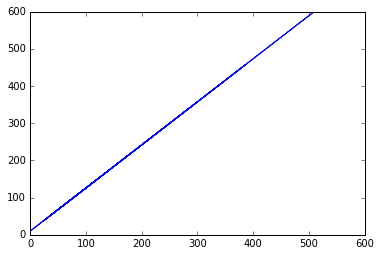

In [191]:
Y = X_train_F * b0 + b1
plt.plot(X_train_F,Y)

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [175]:
from sklearn.metrics import mean_squared_error,r2_score
import math

X_test_F = np.array(X_test).reshape(-1,1)

Y_predict = regression_model.predict(X_test_F)

mse = mean_squared_error(Y_test,Y_predict)

root_mean_square_err = math.sqrt(mse)

r2 = r2_score(Y_test,Y_predict)

print(f'The R2 score of the model is                :{r2}')
print(f'The root mean squares error of the model is : {root_mean_square_err}')
print('\n')
print(f'This implies there is an average difference of 23.38 between the predicted value and the actual value')

The R2 score of the model is                :0.9181922560396981
The root mean squares error of the model is : 23.385235190249123


This implies there is an average difference of 23.38 between the predicted value and the actual value


## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [180]:
acc_test = regression_model.score(X_test_F,Y_test)
acc_train = regression_model.score(X_train_F,Y_train)

print(f'The accuracy score for test data is: {acc_test}')
print(f'The accuracy score for train data is: {acc_train}')

The accuracy score for test data is: 0.9181922560396981
The accuracy score for train data is: 0.9682175540860046
